In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from statannot import add_stat_annotation
from sklearn import metrics

In [2]:
from utilities_mod import *
from stratifiedKM_plot import * 


In [6]:
file_path = select_file()
print(file_path)

# The following lines print variables 'population' and 'folder'.
# If not, make sure to define them before using them.
print(population)
print(folder)

/Users/pavel/Desktop/MS-GRS/ON & MS/Redoing analysis/data_final/on_ms_undif_on_0709.tsv
genpop
genpop_replication_1607


In [7]:
data = pd.read_csv(file_path, sep="\t", low_memory=False)
# Read data from the specified file path using pandas read_csv function with tab separator

# Creating a dummy variable 'Sex_Female'
data = pd.get_dummies(data, columns=['Sex'], drop_first=False)
# Convert categorical variable 'Sex' into dummy variables and add a 'Sex_Female' column
data.drop(labels='Sex_Male', axis=1, inplace=True)
# Drop the 'Sex_Male' column after creating dummy variables

# Print summary statistics for the 'TDI' column and for the 'BMI' column for records where 'died' is not equal to 1
print(data.TDI.describe(), '\n', data.loc[data.died != 1].BMI.describe())

# Fill missing values in the 'TDI' and 'BMI' columns with their respective medians, as missingnes is low
data.TDI.fillna(data.TDI.median(), inplace=True)
data.BMI.fillna(data.BMI.median(), inplace=True)

# Print summary statistics for the 'TDI' column and 'BMI' column after filling missing values
print(data.TDI.describe(), '\n', data.BMI.describe())

# Drop rows where 'full_expanded' column has missing values and reset the index
data = data[data.full_expanded.notna()]
data.reset_index(drop=True, inplace=True)

# Normalize the 'age_MS' column using mean and standard deviation
data['age_MS_norm'] = ((data.loc[:, 'age_MS'] - data.age_MS.mean()) / data.age_MS.std())

# Calculate a standardized MS-GRS for Undifferentiated ON population
data['stand_MS_GRS'] = ((data.loc[data.undif_ON == 1, 'full_expanded']
                         - np.mean(data.loc[data.undif_ON == 1, 'full_expanded']))
                        / np.std(data.loc[data.undif_ON == 1, 'full_expanded']))

count    545.000000
mean      -1.240344
std        3.088442
min       -6.258260
25%       -3.680540
50%       -2.044280
75%        0.759912
max        8.528810
Name: TDI, dtype: float64 
 count    522.000000
mean      27.770453
std        5.123657
min       17.705500
25%       24.175200
50%       26.953750
75%       30.467350
max       46.671300
Name: BMI, dtype: float64
count    545.000000
mean      -1.240344
std        3.088442
min       -6.258260
25%       -3.680540
50%       -2.044280
75%        0.759912
max        8.528810
Name: TDI, dtype: float64 
 count    545.000000
mean      27.723196
std        5.054235
min       17.705500
25%       24.193800
50%       26.920750
75%       30.371500
max       46.671300
Name: BMI, dtype: float64


In [ ]:
# data.loc[((data.ON_group == "MS-ON") & (data.first_ON!=1)), 'expanded_nonhla_grs'].describe()
# data.loc[data.ON_group == "Controls", 'expanded_nonhla_grs'].describe()

In [ ]:
# print(len(data))
# data = data.loc[data.white_british==1]
# data.reset_index(drop=True, inplace=True)
# len(data)

In [ ]:
# merger = pd.read_csv("on_ms_genpop_3004.tsv", sep = "\t", low_memory=False)
# merger = merger[['n_eid','gp_flag_MS', 'gp_flag_ON', 'hes_flag_MS', 'hes_flag_ON']]

In [ ]:
#data = pd.merge(data, merger, on='n_eid', how = 'outer')

In [ ]:
# print(len(data))
# data = data.loc[(((data.age_ON >20) & (data.age_MS>20)) | 
#                    ((data.age_MS.isna()==True) & (data.age_ON >20))|
#                    ((data.age_ON.isna()==True) & (data.age_MS>20)) | 
#                   ((data.age_ON.isna()==True) & (data.age_MS.isna()==True)))]

# len(data.loc[data.died!=1])

In [ ]:
# print(len(data))
# data['strict_diag_MS']=0
# data['strict_diag_ON']=0

# data.loc[((data.hes_flag_MS ==1) | (data.gp_flag_MS ==1)), "strict_diag_MS"] = 1
# data.loc[((data.hes_flag_ON ==1) | (data.gp_flag_ON ==1)), "strict_diag_ON"] = 1
# print(data.MS_any.value_counts())
# print(data.ON_any.value_counts())
# print(data.ON_group.value_counts())
# print(data.strict_diag_MS.value_counts())
# print(f" If strict diagnosis: {data.strict_diag_ON.value_counts()}")


# print(len(data))
# data = data.loc[((data.ON_group == "Controls") |
#           ((data.strict_diag_MS == 1) &  (data.ON_group =="MS only")) |
#           ((data.strict_diag_ON ==1)& (data.ON_group =="ON only"))|
#           ((data.strict_diag_MS==1) & (data.strict_diag_ON==1) & (data.ON_group=="MS-ON")) 
#          )]
# data.reset_index(drop=True, inplace=True)
# print(len(data))
# print(len(data.loc[data.died!=1]))

In [ ]:
# from importlib import reload
# import utilities_mod
# reload(utilities_mod)
# from utilities_mod import *
# print(population)

In [8]:
# Define population groups and their attributes

# Select rows from the 'data' DataFrame where the 'ON_group' column has the value "Controls"
controls = data[data.ON_group == "Controls"]
# Define a label for the 'Controls' group
control_label = "Controls"
# Define a color for plotting the 'Controls' group
control_colour = 'lightgreen'

ON_group = data[data.ON_group == "ON only"]
ON_label = "ON only"
ON_colour = "indianred"


MS_group = data[data.ON_group == "MS only"]
MS_label = "MS only"
MS_colour = "steelblue"


ON_and_MS_group = data[data.ON_group == "MS-ON"]
ON_and_MS_label = "MS-ON"
ON_and_MS_colour = "darkmagenta"


In [9]:
# Define font styles for ticks on axes
tick_font = {
    'family': 'sans-serif',  # Font family for the tick labels
    'weight': 'medium',  # Font weight for the tick labels (e.g., 'medium')
    'size': 7,  # Font size for the tick labels
}

# Define font styles for labels
label_font = {
    'family': 'sans-serif',  # Font family for the label text
    'weight': 'medium',  # Font weight for the label text (e.g., 'medium')
    'size': 10,  # Font size for the label text
}

# Set the font style for tick labels using the defined 'tick_font'
plt.rc('font', **tick_font)

# Define the width of a figure with double-column layout (for publishing requirements)
double_col_width = 7.0867

# Define the width of a figure with single-column layout (for publishing requirements)
col_width = 3.46457

In [ ]:
#Plotting histogram + KDE for all groups. NB: MS-GRS is called 'full_expanded'

kwargs = dict(kde_kws={'linewidth':1.2, "bw_adjust":.95}, hist_kws={'alpha':.12}, rug_kws = {'alpha':0.8, 'linewidth':.9, 'height':0.2})
plt.figure(figsize=(double_col_width, 3.504), dpi= 300, facecolor=None)

#Listing all groups, labels and colors to be plotted
groups = [controls.full_expanded, ON_group.full_expanded, ON_and_MS_group.full_expanded, MS_group.full_expanded]
labels = [control_label, ON_label, ON_and_MS_label, MS_label]
colours = [control_colour, ON_colour, ON_and_MS_colour, MS_colour]

plt.subplot(121)

# Iterate through each group and plot a distribution using seaborn's distplot
for (group,label,colour) in zip(groups, labels, colours):
    sns.distplot(group, color = colour,
                 label = "{pop_label}, n={len_df}".format(pop_label = label,len_df= '{:,}'.format(len(group))),
                 **kwargs)

plt.xlabel("MS-GRS", fontdict=label_font)
plt.ylabel("Density", fontdict=label_font)

plt.xlim([-2.3, 8])

#plt.title('MS-GRS distribution in 4 groups')
leg = plt.legend(prop={'size': 6})
for lh in leg.legendHandles: 
    lh.set_alpha(0.8)

plt.subplot(122)

upd_pal= create_palette(labels, colours)


ax = sns.violinplot(x = 'ON_group', y='full_expanded',data=data, inner = 'box', palette = upd_pal, order =upd_pal.keys(),
                    linewidth=1.1, fontdict=label_font, orient='v')
ax.set_xlabel('Group', fontdict=label_font)
ax.set_ylabel('MS-GRS', fontdict=label_font)
#ax.set_yticklabels(ax.get_yticks(), size = 15)
for violin, alpha in zip(ax.collections[::2], [0.85,0.85,0.8,0.8]):
    violin.set_alpha(alpha)

# Add statistical annotations to the violin plot
add_stat_annotation(ax, data=data, x='ON_group', y='full_expanded', order = upd_pal.keys(),
                    box_pairs=[("MS-ON", "MS only"), ("MS-ON", "ON only"), ("ON only", "Controls"), ("ON only", "MS only")],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)

plt.tight_layout()
#plt.savefig(create_png_label('4_hist'))
#plt.show()

In [ ]:
# #Plotting a fugire without positive or negative controls

# plt.figure(figsize=(col_width, col_width), dpi= 300)

# groups_two = [ ON_group.full_expanded, ON_and_MS_group.full_expanded]
# labels_two = [ ON_label, ON_and_MS_label]
# colours_two = [ON_colour, ON_and_MS_colour]


# kwargs = dict(kde_kws={'linewidth':0.9}, hist_kws={'alpha':.2}, rug_kws = {'alpha':0.65, 'linewidth':.35, 'height':0.09})

# for (group,label,colour) in zip(groups_two, labels_two, colours_two):
#     sns.distplot(group, color = colour, rug=True,
#                  label = "{pop_label}, n={len_df}".format(pop_label = label,len_df=len(group)),
#                  **kwargs, bins=22)


# #plt.title('Distribution of MS-GRS')
# plt.xlabel("MS-GRS", fontdict=label_font)
# plt.legend()
# plt.ylim([0, 0.40])
# #plt.title('MS-GRS in MS-ON vs ON Only', fontdict=)

# plt.savefig(create_png_label('on_vs_ms_hist'))

In [ ]:
# //TODO: move to supplement

# plt.figure(figsize= [3.504,3.504], dpi=300, facecolor=None)

# data_mson = data.loc[((data.ON_group == 'MS-ON') & (data.simult_MS_ON !=1)) ]
# data_mson.loc[ data_mson.first_MS ==1, 'first_MS'] = 'MS first'
# data_mson.loc[(data_mson.first_MS !='MS first'), 'first_MS'] = "ON first"

# order = ['MS first', 'ON first']
# labels_mson = order
# upd_pal= create_palette(labels_mson, colours)

# ax = sns.boxenplot(x = 'first_MS', y='full_expanded', data=data_mson, order = ['MS first', 'ON first'], palette = 'Accent')

# add_stat_annotation(ax, data=data_mson, x='first_MS', y='full_expanded', order = order, box_pairs= [('MS first', 'ON first')],
#                     test='t-test_welch', text_format='star', loc='inside', verbose=2)

# plt.ylim([-0.2,7.9])

# ax.text(-0.2,0.25,'n=122')
# ax.text(0.8,0.25,'n=124')

# plt.ylabel('MS-GRS')
# plt.xlabel('First diangosis in MS-ON')
# plt.tight_layout()

# plt.savefig(create_png_label('firstMS_vs_firstON', folder = folder))

In [ ]:
from cross_val_reg import *

In [ ]:
# Selecting target variable 'MS_any'
y = data.loc[:, ["MS_any"]]

# Selecting predictor variables for different models: Null, Full, MS-GRS only, HLA-GRS only, non-HLA-GRS only
x_null = data.loc[:, ["Sex_Female", "TDI", "PC1", "PC2", "PC3", "PC4", "enrol_age"]]
x_full = data.loc[:, ['full_expanded', "Sex_Female", "TDI", "PC1", "PC2", "PC3", "PC4", "enrol_age"]]
x_grs = data.loc[:, ['full_expanded']]
x_hlagrs = data.loc[:, ['ten_full_hla']]
x_nonhlagrs = data.loc[:, ['expanded_nonhla_grs']]

# Performing cross-validation and calculating ROC-AUC for different predictor sets
null_crossval = crossval_logreg_rocauc(x_null, y)
full_crossval = crossval_logreg_rocauc(x_full, y)
grs_crossval = crossval_logreg_rocauc(x_grs, y)

# Performing empirical FPR-TPR calculation for different predictor sets
null_empirical = empirical_fpr_tpr(x_null, y)
full_empirical = empirical_fpr_tpr(x_full, y)
grs_empirical = empirical_fpr_tpr(x_grs, y)

# Performing cross-validation and calculating ROC-AUCs
hlagrs_crossval = crossval_logreg_rocauc(x_hlagrs, y)
nonhlagrs_crossval = crossval_logreg_rocauc(x_nonhlagrs, y)
hlagrs_empirical = empirical_fpr_tpr(x_hlagrs, y)
nonhlagrs_empirical = empirical_fpr_tpr(x_nonhlagrs, y)

In [ ]:
print_ci_rocauc(full_crossval)

In [ ]:
#Plotting ROC-AUC curves for data above

roc_linewidth = 1.1
plt.figure(figsize= [double_col_width, 3.57], dpi=300, facecolor=None)

#Plotting ROC-AUC curves

plt.subplot(122)
plt.plot(grs_empirical[0], grs_empirical[1],
         label = 'MS-GRS (AUC={i})'.format(i=round(grs_crossval[2],3)), linewidth = roc_linewidth, color='seagreen',alpha=0.8)

plt.plot(hlagrs_empirical[0], hlagrs_empirical[1],
         label = 'HLA-GRS (AUC={i})'.format(i=round(hlagrs_crossval[2],3)), linewidth = roc_linewidth, color ='darkorange', alpha=.8)

plt.plot(nonhlagrs_empirical[0], nonhlagrs_empirical[1],
         label = 'non-HLA-GRS (AUC={i})'.format(i=round(nonhlagrs_crossval[2],3)), linewidth = roc_linewidth, color = 'darkturquoise', alpha=.8 )

plt.plot([0, 1], [0, 1], color='dimgrey', linewidth=1.2, linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.grid(which='minor', alpha=0.12)
plt.grid(which='major', alpha=0.1)

plt.xticks(np.arange(0.2,1.1,0.2))
plt.xlabel('False Positive Rate',fontdict=label_font )
plt.ylabel('True Positive Rate', fontdict=label_font)
plt.legend(prop={'size': 7}, loc = 4)



plt.subplot(121)

plt.plot(grs_empirical[0], grs_empirical[1],
         label = 'MS-GRS (AUC={i})'.format(i=round(grs_crossval[2],3)), linewidth = roc_linewidth, color='seagreen', alpha=0.8)

plt.plot(full_empirical[0], full_empirical[1],
         label = 'MS-GRS+Covariates (AUC={:.3f})'.format(round(full_crossval[2],3)), linewidth = roc_linewidth, color ='indianred', alpha=0.8 )

plt.plot(null_empirical[0], null_empirical[1],
         label = 'Null model (AUC={i})'.format(i=round(null_crossval[2],3)), linewidth = roc_linewidth, color = 'slategrey', alpha=0.8)

plt.plot([0, 1], [0, 1], color='dimgrey', linewidth=1.2, linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.grid(which='minor', alpha=0.12)
plt.grid(which='major', alpha=0.1)

plt.xticks(np.arange(0.2,1.1,0.2))
plt.xlabel('False Positive Rate', fontdict=label_font )
plt.ylabel('True Positive Rate', fontdict=label_font)
plt.legend(prop={'size': 7}, loc=4)
#plt.suptitle('non-white-British only')


plt.savefig(create_png_label('roc_ALL_models', folder=folder))

## Describing data: supplementary analysis of MS-GRS association with other variables

In [ ]:
# This plots a graph between age at ON diag and MS-GRS

plt.figure(figsize=[col_width, col_width], dpi=300)


g = sns.jointplot(data=data.loc[data.MS_any ==1], x="full_expanded", y="age_MS", hue="Sex_Female", marker='+',
                  xlim=[-1.5,8], ylim=[10, 85], palette = 'bright')
g.plot_joint(sns.kdeplot,levels=0 )

#plt.title('MS-GRS vs age at MS diagnosis')
plt.xlabel('MS-GRS')
plt.ylabel('Age at MS report')
plt.tight_layout()
plt.legend()


#plt.savefig(create_png_label('MSageVsGRS_bySex'))



In [ ]:
plt.figure(figsize=[col_width, col_width], dpi=300)


sns.jointplot(y= 'age_MS_norm', x = 'full_expanded', data=data.loc[data.MS_any ==1], kind='reg', marker='+', xlim=[-1,8])
plt.xlabel('MS-GRS')
plt.ylabel('Standardised age at MS report')

plt.savefig(create_png_label('grs_standAge'))


In [ ]:

plt.figure(figsize=[double_col_width, 4], dpi = 300)
order = ['Controls', 'MS only', 'ON only', 'MS-ON']


plt.subplot(211)
#data_ms = data.loc[:, ['MS_any', 'Sex', 'full_expanded']]
#data_ms.loc[data.MS_any ==1, 'MS_any'] = 'any MS'
ax = sns.boxenplot(x = 'ON_group', y='expanded_nonhla_grs',data=data, palette = 'bright',  hue='Sex', order=order, trust_alpha=0.1)


add_stat_annotation(ax, data=data, x='ON_group', hue='Sex', y='expanded_nonhla_grs', order=order,
                    box_pairs= [
                                (("Controls",'Female'), ('Controls','Male')),
                                (("ON only",'Female'), ('ON only','Male')),
                                (("MS-ON",'Female'), ('MS-ON','Male')),
                                 (("MS only",'Female'), ('MS only','Male')),
                                
                               ],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)

plt.ylim([-3,9])
ax.text(-0.45,-2.8,'n=260K / 221K')
ax.text(0.65,-1.8,'n=1504 / 599')
ax.text(1.65,-1.8,'n=252 / 169')
ax.text(2.65,8,'n=206 / 60')

plt.ylabel('HLA-GRS')
plt.xlabel('Group')

plt.tight_layout()



plt.subplot(212)

order = ['Controls', 'MS only', 'ON only', 'MS-ON']


ax = sns.boxenplot(x = 'ON_group', y='ten_full_hla',data=data, palette = 'bright',  hue='Sex', order=order)


add_stat_annotation(ax, data=data, x='ON_group', hue='Sex', y='ten_full_hla', order=order,
                    box_pairs= [
                                (("Controls",'Female'), ('Controls','Male')),
                                (("ON only",'Female'), ('ON only','Male')),
                                (("MS-ON",'Female'), ('MS-ON','Male')),
                                 (("MS only",'Female'), ('MS only','Male')),
                                
                               ],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)


plt.ylim([-3,4.5])


ax.text(-0.45,-2.8,'n=260K / 221K')
ax.text(0.65,-1.8,'n=1504 / 599')
ax.text(1.65,-1.8,'n=252 / 169')
ax.text(2.65,3.6,'n=206 / 60')

plt.ylabel('HLA-GRS')
plt.xlabel('Group')

plt.tight_layout()

plt.savefig(create_png_label('msgrs_bySex', folder=folder))

In [ ]:
ethnicity_list = [ethn for ethn in data.ethnic_background.value_counts().index 
                  if ethn in list(data[data.MS_any==1].ethnic_background.value_counts().index) and
                  ((data[data.MS_any==1].ethnic_background.value_counts()[ethn])>=5)]



plt.figure(figsize=[double_col_width, 6], dpi = 300)


plt.subplot(211)
ax = sns.boxenplot(y = 'full_expanded', x='ethnic_background',data=data,hue='MS_any',order = ethnicity_list, palette = 'bright', trust_alpha=0.1)


# add_stat_annotation(ax, data=data, x='ON_group', hue='Sex', y='expanded_nonhla_grs', order=order,
#                     box_pairs= [
#                                 (("Controls",'Female'), ('Controls','Male')),
#                                 (("ON only",'Female'), ('ON only','Male')),
#                                 (("MS-ON",'Female'), ('MS-ON','Male')),
#                                  (("MS only",'Female'), ('MS only','Male')),
                                
#                                ],
#                     test='t-test_welch', text_format='star', loc='inside', verbose=2)

plt.ylim([-3.5, 9])

frac = 0.49
for i,ethn in enumerate(ethnicity_list):
    ax.text(i-frac,-3.1,
            f"{data.groupby('MS_any').ethnic_background.value_counts()[0][ethn]} / {data.groupby('MS_any').ethnic_background.value_counts()[1][ethn]}", 
           rotation=15, fontsize=6)
    frac-=0.04
    
    
plt.ylabel('MS-GRS')
plt.xlabel('UKBB Ethnic background')
plt.xticks(fontsize=6, rotation=22)
plt.tight_layout()

plt.subplot(212)
ax = sns.boxenplot(y = 'full_expanded', x='white_british',data=data,hue='MS_any',order=[1, 0], palette = 'bright', trust_alpha=0.1)

add_stat_annotation(ax, data=data, y = 'full_expanded', x='white_british', hue="MS_any", order=[1,0],
                    box_pairs= [
                                ((1,1), (1,0)),
                                ((1,1), (0,1)),
                                ((0,1), (0,0)),
                                ((1,0), (0,0)),                        

                                
                               ],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)
plt.ylabel('MS-GRS')
plt.xlabel('Ethnicity dichtomised')
plt.xticks(ticks = [0,1], labels=['white British', 'Other'])

plt.ylim([-3, 12.87])
ax.text(-.11,-2.9,
        f"{data.groupby('white_british').MS_any.value_counts()[1][0]} / {data.groupby('white_british').MS_any.value_counts()[1][1]}", 
       rotation=0, fontsize=6)
ax.text(1-.09,-2.9,
        f"{data.groupby('white_british').MS_any.value_counts()[0][0]} / {data.groupby('white_british').MS_any.value_counts()[0][1]}", 
       rotation=0, fontsize=6)

plt.tight_layout()

plt.savefig(create_png_label('grs_byethnicity.svg'))

In [ ]:
for i,ethn in enumerate(ethnicity_list):
    print(f"{data.groupby('MS_any').ethnic_background.value_counts()[0][ethn]} / {data.groupby('MS_any').ethnic_background.value_counts()[1][ethn]}")

In [ ]:
plt.figure(figsize=[4,3], dpi=180)
ax = sns.histplot(x = 'age_MS', data=data, stat='count', color='steelblue')
ax.axvline(data.age_MS.mean(), color='r',)

ax.axvline(data.age_MS.quantile(0.95), color='lawngreen')
ax.axvline(data.age_MS.quantile(0.05), color='lawngreen')

ax.set_xticks(range(0,82,5))
ax.tick_params(axis='both', which='major', labelsize=9)

plt.xlabel('Age at MS report')
plt.tight_layout()
plt.savefig(create_png_label('hist_MSage'))



In [ ]:
plt.figure(figsize=[4,3], dpi=300)
ax = sns.histplot(x = 'age_ON', data=data.loc[data.undif_ON==1], stat='count', color='indianred')
ax.axvline(data.loc[data.undif_ON==1].age_ON.quantile(0.5), color='r',)

ax.axvline(data.loc[data.undif_ON==1].age_ON.quantile(0.95), color='lawngreen')
ax.axvline(data.loc[data.undif_ON==1].age_ON.quantile(0.05), color='lawngreen')

ax.set_xticks(range(0,82,5))
ax.tick_params(axis='both', which='major', labelsize=9)

plt.xlabel('Age at ON report')
plt.title('Age at ON report, undifferentiated ON', fontdict=tick_font)
plt.tight_layout()
plt.savefig(create_png_label('undifferentiated_ON_AAO'))

In [ ]:
plt.figure(figsize=[4,3], dpi=300)

ax = sns.histplot(x = 'age_ON', data=data.loc[data.undif_ON==1], stat='count', hue='MS_any',
                  palette=['indianred','steelblue'], multiple='stack')

#ax.axvline(data.loc[data.undif_ON==1].age_ON.quantile(0.5), color='r',)

#ax.axvline(data.loc[data.undif_ON==1].age_ON.quantile(0.95), color='lawngreen')
#ax.axvline(data.loc[data.undif_ON==1].age_ON.quantile(0.05), color='lawngreen')

ax.set_xticks(range(0,82,5))
ax.tick_params(axis='both', which='major', labelsize=9)

plt.xlabel('Age at ON report')
plt.title('Age at ON report, undifferentiated ON', fontdict=tick_font)
plt.tight_layout()

plt.savefig(create_png_label('undiffON_vsMS_AAO'))

In [ ]:
plt.figure(figsize=[4,3], dpi=300)

ax = sns.histplot(x = 'age_ON', data=data.loc[data.ON_any==1], stat='count', color='indianred')

ax.axvline(data.loc[data.ON_any==1].age_ON.quantile(0.5), color='r',)

ax.axvline(data.loc[data.ON_any==1].age_ON.quantile(0.95), color='lawngreen')
ax.axvline(data.loc[data.ON_any==1].age_ON.quantile(0.05), color='lawngreen')

ax.set_xticks(range(0,84,5))
ax.tick_params(axis='both', which='major', labelsize=9)

plt.xlabel('Age at ON report')
plt.title('Age at ON report, All ON', fontdict=tick_font)
plt.tight_layout()

plt.savefig(create_png_label('ON_AAO'))

In [10]:
# Fill missing values in the 'first_ON' column with 0 for people who did not develop MS
data.first_ON.fillna(0, inplace=True)

# Fill missing values in the 'ever_smoked' column with -3
data.ever_smoked.fillna(-3, inplace=True)


on_to_ms_data = data[(data.undif_ON == 1)]

# Update the 'ON_to_MS_years' column for cases where it was originally 0
on_to_ms_data.loc[on_to_ms_data.ON_to_MS_years == 0, 'ON_to_MS_years'] = 0.5 / 365

# Rename the 'full_expanded' column to 'MS-GRS'
on_to_ms_data.rename(columns={'full_expanded': 'MS-GRS'}, inplace=True)

# Calculate and fill normalized BMI values
on_to_ms_data.loc[:, 'BMI_norm'] = (on_to_ms_data.loc[:, 'BMI'] - on_to_ms_data.BMI.mean()) / on_to_ms_data.BMI.std()
on_to_ms_data.BMI_norm.fillna(on_to_ms_data.BMI_norm.median(), inplace=True)

# Calculate and fill normalized TDI values
on_to_ms_data.loc[:, 'TDI_norm'] = (on_to_ms_data.loc[:, 'TDI'] - on_to_ms_data.TDI.mean()) / on_to_ms_data.TDI.std()

In [ ]:
kmf_data = on_to_ms_data.loc[:,['MS-GRS','first_ON','ON_to_MS_years',
                               "Sex_Female", 'age18to50', 'age_ON', 'age_MS', 'BMI_norm','TDI_norm','country_of_birth', 'ethnicity', ]] #ADD ANYTHING TO THE LIST 

# kmf_data.rename(mapper= {"MS-GRS":"cph_prediction"}, axis = 1, inplace = True)
#Calculating follow-up time by reversing censoring in Kaplan-Meier and estimating median "survival time". Based on https://www.sciencedirect.com/science/article/pii/019724569600075X
# kmf_data_copy = kmf_data
# kmf_data_copy.replace({'first_ON':{0:1, 1:0}}, inplace=True)

# kmf_fu_time = KaplanMeierFitter()

# kmf_fu_time.fit(kmf_data_copy.ON_to_MS_years, kmf_data_copy.first_ON)

# kmf_fu_time.plot()

# print(kmf_fu_time.median_survival_time_)
# print(len(kmf_data_copy))
# surv_funct = kmf_fu_time.survival_function_
# surv_funct.loc[surv_funct.KM_estimate<=0.750]
# plot_km(kmf_data, cut_off_quarts,save_label= 'unadjusted_KM_quartiles',
#         plot_label='Unadjusted KM, by MS-GRS quartile', figsize=[col_width+0.3,4.5])

In [ ]:

#kmf_data is a copy of on_to_ms_data Dataframe, which includes only undifferentiated ON. You can use on_to_ms_data instead
kmf_data = on_to_ms_data.loc[:,['MS-GRS','first_ON','ON_to_MS_years']]

kmf_fu_time = KaplanMeierFitter()
kmf_fu_time.fit(kmf_data.ON_to_MS_years, kmf_data.first_ON)

# Plot unadjusted Kaplan Meier of the whole Undifferentiated ON
plt.figure(figsize=[8,4], dpi=300)
kmf_fu_time.plot()

# Extract cumulative density (number of MS-ON) at three times
print(kmf_fu_time.cumulative_density_at_times([5,10,20]))

# Next steps: divide the UKBB desnity by the Finngen density, and adjust the x-value in calibration by this ratio

In [ ]:
# kmf_unadj_data = rename_sex_diagnosis(kmf_data)

# kmf_strat = stratify_kmf(kmf_unadj_data, cut_off_quarts)


# for i in kmf_strat:
#     print(i.groupby('Sex')['age18to50'].value_counts())
#     #print(i['age18to50'].value_counts())
#     #print(i.Sex.value_counts())
#     #print(i[i.first_ON =='MS-ON'].Sex.value_counts())
    

In [9]:
from backward_elimination import *
from  stratifiedKM_plot import *
from utilities_mod import *

In [1]:
cph_data =on_to_ms_data.loc[:,['stand_MS_GRS','Sex_Female', 'age18to50','first_ON','ON_to_MS_years']]
#cph_data = pd.get_dummies(cph_data, columns = ['vitd_level'], drop_first=False)
#cph_data.drop("vitd_level_0", axis=1, inplace=True)

cph = CoxPHFitter()

cph = cph.fit(cph_data, duration_col='ON_to_MS_years', event_col='first_ON')
cph.print_summary()

NameError: name 'on_to_ms_data' is not defined

In [ ]:
import pickle
# Open the file to save as pickle
cph_pickle = open("Cox_proportional_hazard_UKBB_GRS_sex_age.pkl", 'wb')

# Write to the file
pickle.dump(cph, cph_pickle)
cph_pickle.close()

In [ ]:
# cph_pickle_null = open("Null_CPH_UKBB_sex_age.pkl", 'wb')
# pickle.dump(cph_null, cph_pickle_null)
# cph_pickle_null.close()



In [ ]:

ukbb_null = open("Null_CPH_UKBB_sex_age.pkl", "rb")

#You may want to rename if there are variables named 'cph'
cph_null = pickle.load(ukbb_null)
ukbb_null.close()

In [ ]:
ukbb_full = open("Cox_proportional_hazard_UKBB_GRS_sex_age.pkl", 'rb')
cph= pickle.load(ukbb_full)
ukbb_full.close()
cph.summary

# on_to_ms_data is data for Undiffferentiated ON only, this can be named differently in your dataset
cph_data = on_to_ms_data.loc[:,['stand_MS_GRS','Sex_Female', 'age18to50','first_ON','ON_to_MS_years']]
cph_data['cph_prediction'] = cph.predict_partial_hazard(cph_data)

plot_km(cph_data, cut_off_dict=cut_off_quarts,save_label='Figure5', plot_label = '', figsize=[col_width,col_width+0.7])

In [ ]:
# ukbb_full = open("Cox_proportional_hazard_UKBB_GRS_sex_age.pkl", 'rb')
# cph  = pickle.load(ukbb_full)
# ukbb_full.close()

ICI =  0.010889953549186333
E50 =  0.008972682271260468
ICI =  0.004802852491449238
E50 =  0.0035708241855069156
ICI =  0.002528436038559323
E50 =  0.0028851606557015463


/Users/pavel/Desktop/MS-GRS/ON & MS/Redoing analysis/data_final/utilities_mod.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df.Sex_Female
/var/folders/lt/g5gx9ncd40b1hj431tb2zv240000gn/T/ipykernel_61356/3939121335.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cph_plotting['cph_prediction'] = cph.predict_partial_hazard(cph_data)


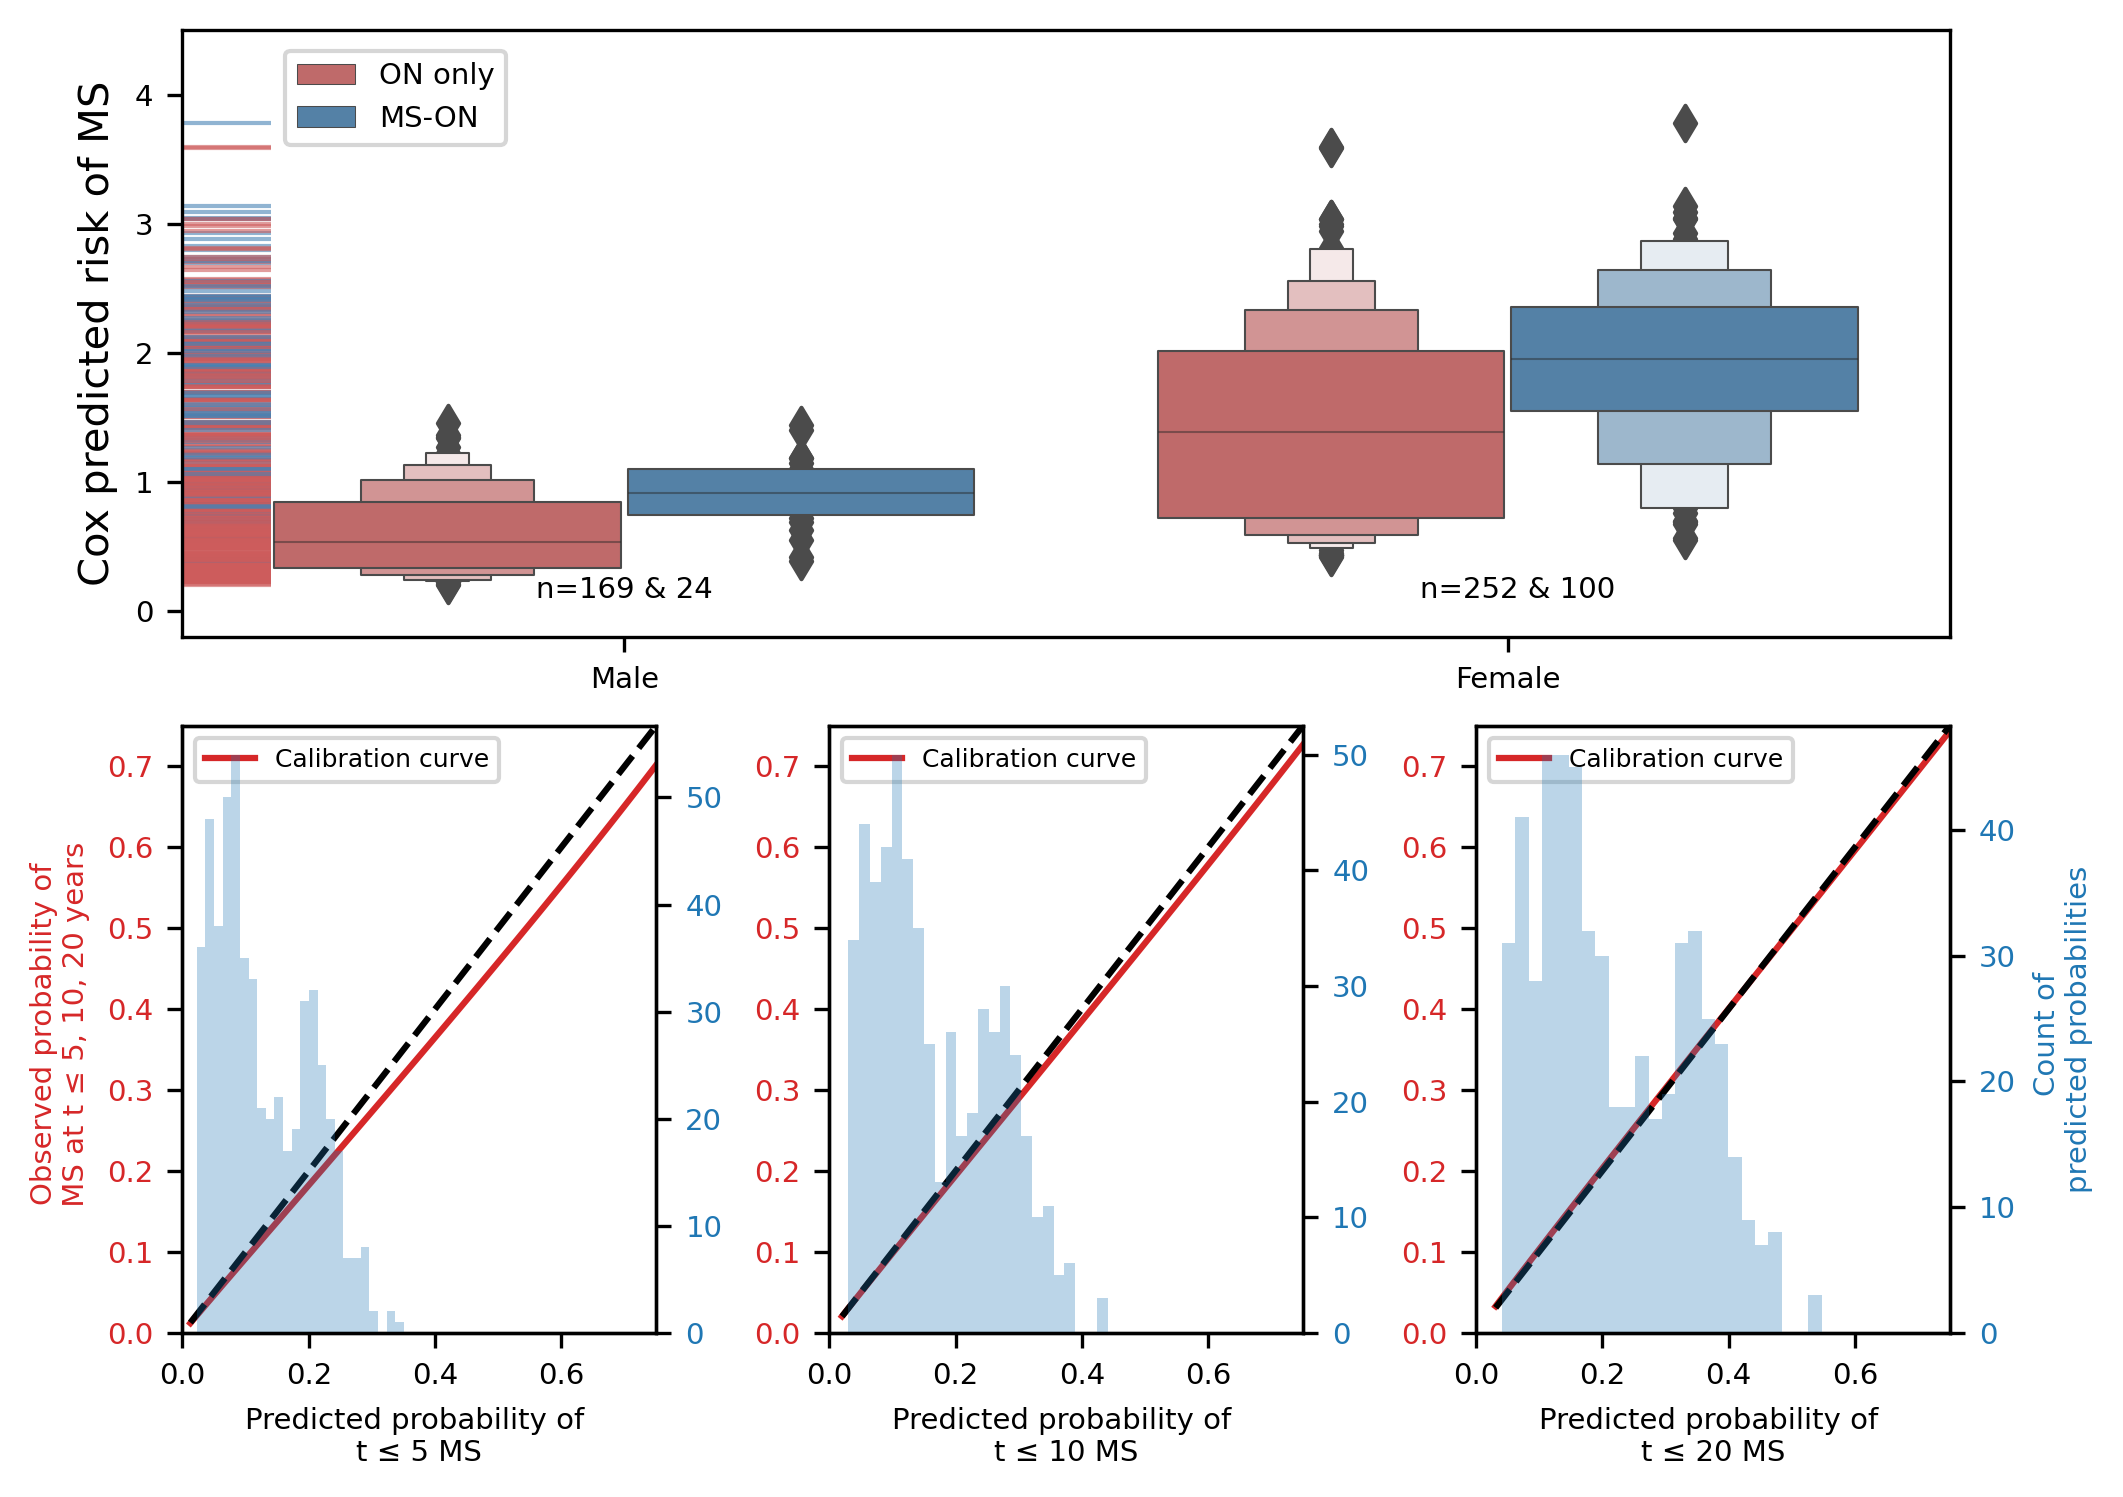

In [19]:
# Create a figure for visualizations with specified dimensions and resolution
plt.figure(figsize=[double_col_width, 5], dpi=300, facecolor=None)

# Subplot 1: Survival Probability Calibration at t0 = 5 years
plt.subplot(234)
ax = survival_probability_calibration(model=cph, df=cph_data, t0=5, left_y_axis=True)[0]

# Subplot 2: Survival Probability Calibration at t0 = 10 years
plt.subplot(235)
ax1 = survival_probability_calibration(model=cph, df=cph_data, t0=10)[0]

# Subplot 3: Survival Probability Calibration at t0 = 20 years
plt.subplot(236)
survival_probability_calibration(model=cph, df=cph_data, t0=20, right_y_axis=True)[0]

# Subplot 4 (2x3 grid): Cox Predicted Risk of MS by Sex and ON Group
plt.subplot(2, 3, (1, 3))

# Define labels and colors for the 'first_ON' categories
labels_two = ['ON only', 'MS-ON']
colours_two = ['indianred', 'steelblue']

# Rename columns and add predicted hazard values to the plotting DataFrame
cph_plotting = rename_sex_diagnosis(cph_data)
cph_plotting['cph_prediction'] = cph.predict_partial_hazard(cph_data)

# Create a boxen plot with rug plots for Cox predicted risk of MS by Sex and ON Group
ax = sns.boxenplot(x="Sex", y="cph_prediction", hue="first_ON", hue_order=['ON only', 'MS-ON'],
                   palette=create_palette(labels_two, colours_two), linewidth=0.5, data=cph_plotting, outlier_prop=0.01)

ax = sns.rugplot(data=cph_plotting, y="cph_prediction", hue="first_ON", lw=0.2, height=0.05, alpha=.6,
                  palette=create_palette(labels_two, colours_two), ax=ax)

plt.ylabel('Cox predicted risk of MS', fontdict=label_font)
plt.xlabel('')
plt.legend(loc='upper left', bbox_to_anchor=(.05, 0.99, 0.0, 0.0), title_fontsize=18)
plt.ylim([-.2, 4.5])
plt.xlim([-0.5, 1.5])

# Annotate the legend with sample sizes
ax.text(-0.1, 0.1, 'n=169 & 24')
ax.text(0.9, 0.1, 'n=252 & 100')

# Adjust layout to ensure readability
plt.tight_layout()

# Uncomment the next line to save the figure as a PNG file
# plt.savefig(create_png_label('Figure4_calibration'))

## Fitting Cox Proportional Hazard models and describing each of them

In [12]:
# Select specific columns from the 'on_to_ms_data' DataFrame for Cox Proportional Hazard analysis
cph_data = on_to_ms_data.loc[:, ['stand_MS_GRS', 'age18to50', 'Sex_Female', 'first_ON', 'ON_to_MS_years']]

# Uncomment the next two lines if you want to create dummy variables for 'ever_smoked' column
# cph_data = pd.get_dummies(cph_data, columns=['ever_smoked'], drop_first=False)
# cph_data.drop("ever_smoked_0.0", axis=1, inplace=True)

# Uncomment the next line if you want to fill missing values in 'BMI' column with the median of the entire 'data' DataFrame
# cph_data.BMI.fillna(data.BMI.median(), inplace=True)

# Initialize a CoxPHFitter instance for Cox Proportional Hazard analysis
cph = CoxPHFitter()

# Fit the Cox Proportional Hazard model using selected columns from 'cph_data'
cph = cph.fit(cph_data, duration_col='ON_to_MS_years', event_col='first_ON')

# Print the summary of the fitted Cox Proportional Hazard model
cph.print_summary()

# Calculate and add Cox predicted hazard values based on which Stratified quartiles are calculated
cph_data['cph_prediction'] = cph.predict_partial_hazard(cph_data)

<lifelines.CoxPHFitter: fitted with 545 total observations, 421 right-censored observations>
             duration col = 'ON_to_MS_years'
                event col = 'first_ON'
      baseline estimation = breslow
   number of observations = 545
number of events observed = 124
   partial log-likelihood = -699.70
         time fit was run = 2023-07-05 09:23:48 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
stand_MS_GRS   0.26       1.29       0.09             0.07             0.44                 1.07                 1.55
age18to50      0.89       2.43       0.28             0.34             1.43                 1.41                 4.17
Sex_Female     0.79       2.20       0.23             0.34             1.24                 1.41                 3.45

               cmp to    z      p   -log2(p)
covariate                                   
stand_MS_GRS     0.00 2.71   0.01       7.22
age18to50        0.00 3.20 <0.005       9.53
Sex_Female       0.00 3.46 <0.005      10.87
---
Concordance = 0.66
Partial AIC = 1405.39
log-likelihood ratio test = 43.04 on 3 df
-log2(p) of ll-ratio test = 28.62

In [66]:
for i in range(len(cph.summary)):
    print({cph.summary['coef'].index[i]},
          f"{round(cph.summary['exp(coef)'][i], 2)} ({round(cph.summary['exp(coef) lower 95%'][i], 2)}-{round(cph.summary['exp(coef) upper 95%'][i], 2)}),",
          f"P={round(cph.summary['p'][i], 5)}")
    


{'stand_MS_GRS'} 1.36 (1.13-1.63), P=0.00103
{'Sex_Female'} 2.22 (1.42-3.48), P=0.00046
{'enrol_age_years'} 0.94 (0.92-0.97), P=0.0
{'age18to50'} 1.73 (0.98-3.03), P=0.05759


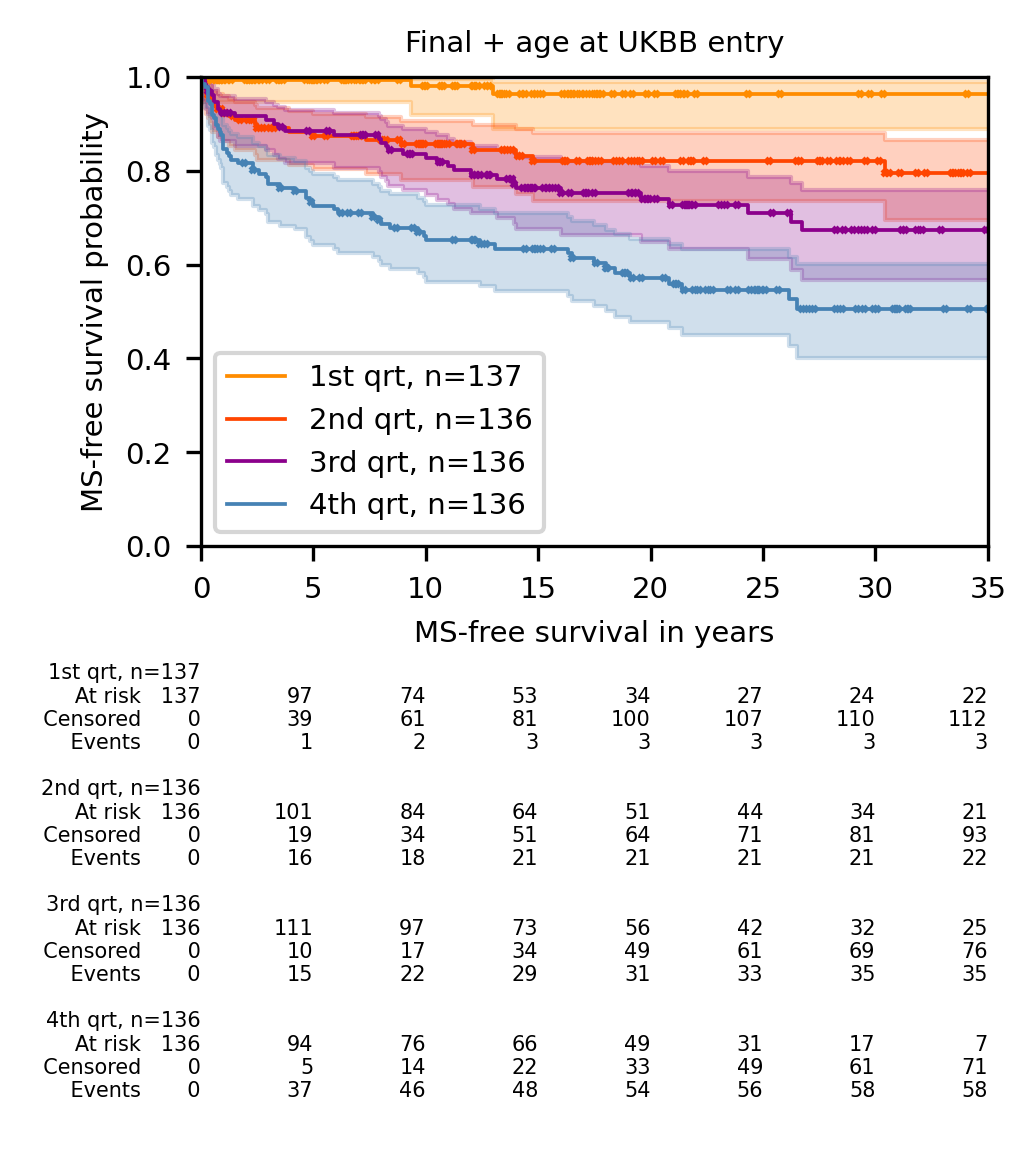

In [68]:
# Call the 'plot_km' function from stratifiedKM_plot.py with specified arguments
plot_km(cph_data, cut_off_dict=cut_off_quarts,save_label='AgeatUKBBEntry', plot_label = '?', figsize=[col_width,col_width+0.7])


In [ ]:
#This script to be run after assinging the cph variable as the CoxPH model
#Checks the proportional hazard assumption using lifelines CoxPHFitter().check_assumptions method
#Creates a list of AxesSubplot objects to save them later

list_of_plots = cph.check_assumptions(cph_data.loc[:, cph_data.columns != 'cph_prediction'], p_value_threshold=0.99, show_plots=True)


#Produces figures from AxesSubplot objects and saves them as .png (which is fine as it for supplement data only)
for i,ax_sub in enumerate([i[0] for i in list_of_plots]):
    ax = ax_sub.get_figure()
    ax.savefig(create_png_label('Schoenfeld_res_{i}'.format(i=i+1)).replace('.svg', '.png'))

In [ ]:
import ms_time_auc
reload(ms_time_auc)


# load models and data
cph_null.summary
cph.summary

data = on_to_ms_data

# plot
plotting_times = np.arange(1, 36)
model_dict = {
    'Null model': {'model':cph_null, 'color':'grey'},
    'MS-GRS+Covariates': {'model':cph, 'color':'green'}
             }
plt.figure(figsize=[col_width,5/(double_col_width/col_width)], dpi = 300)
ms_time_auc.plot_time_auc(data, model_dict, plotting_times)
#plt.savefig(create_png_label(''))


In [ ]:
#cph_data = rename_sex_diagnosis(cph_data)

#for i in stratify_kmf(cph_data, cut_off_quarts):
        #print(i.Sex.value_counts())
 #       print(i.loc[i.first_ON ==1, 'MS-GRS' ].describe())
        #print(i.age18to50.value_counts())
print(cph_data.loc[cph_data.first_ON==1,'stand_MS_GRS'].describe())
    

In [ ]:
# time_list = [5,10,20,68]
# def proportion_ci(data, cut_off_dict, stratify = False):

#     """ Calculates proportion and 95% CI using normal approximation to the binomial """
#     mean_ci_df = pd.DataFrame()
#     for y,i in enumerate(data):
        
#         for ts, timepoint in enumerate(time_list):
            
#             if len(i.loc[(i.first_ON=='MS-ON') & (i.ON_to_MS_years <=timepoint) ] )!=0:
            
#                 n = i.loc[(i.first_ON=='MS-ON') & (i.ON_to_MS_years <=timepoint) ].first_ON.value_counts()[0]
#             elif len(i.loc[(i.first_ON=='MS-ON') & (i.ON_to_MS_years <=timepoint) ]) ==0:
#                 n=0
            
# #             print(len(i), n)
#             p = float(n/len(i))
#             crit_z = 1.96
#             ci_95 = crit_z* ((p*(1-p))/len(i))**.5
        
#             if y ==0:
#                 ci_data = {("lower_ci"+str(timepoint)):round(p-ci_95,3),
#                            ("proportion" + str(timepoint)):round(p,3),
#                            ("upper_ci"+str(timepoint)) :round(p+ci_95,3)}



#                 ci_df = pd.DataFrame([ci_data])
#                 mean_ci_df = pd.concat([mean_ci_df, ci_df], axis=1)
            
#             elif y>0:

#                 mean_ci_df.loc[y, ("lower_ci"+str(timepoint))] = round(p-ci_95,3)
#                 mean_ci_df.loc[y, ("proportion" + str(timepoint))] = round(p,3)
#                 mean_ci_df.loc[y, ("upper_ci"+str(timepoint))] = round(p+ci_95,3)  
            
        
#     return(mean_ci_df)

In [13]:
cph_data = rename_sex_diagnosis(cph_data)
strat_data =stratify_kmf(cph_data, cut_off_dict=cut_off_quarts)
strat_data_f = []
strat_data_m = []
male_markers = []
female_markers = []

for n,i in enumerate(strat_data):
    kk = i.loc[i.Sex=='Female']
    print(len(kk))
    fm = ((len(kk)/len(i))**.5)
    strat_data_f.append(kk)
    female_markers.append(fm)
    
    
for n,i in enumerate(strat_data):
    kk = i.loc[i.Sex =='Male']
    
    print(len(kk))
    mm = ((len(kk)/len(i))**.5)
    strat_data_m.append(kk)
    male_markers.append(mm)
del strat_data_m[-1]
del male_markers[-1]

45
66
105
136
92
70
31
0


/Users/pavel/Desktop/MS-GRS/ON & MS/Redoing analysis/data_final/utilities_mod.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df.Sex_Female


In [14]:
df_ci_f = proportion_ci(strat_data_f, cut_off_dict={0:.25,.25:.5, .5:.75, .75:1})
df_ci_f = df_ci_f*100

df_ci_m = proportion_ci(strat_data_m, cut_off_dict={0:.25,.25:.5, .5:.75, .75:1})
df_ci_m = df_ci_m*100

df_ci =proportion_ci(strat_data,cut_off_dict={0:.25,.25:.5, .5:.75, .75:1} )*100

In [15]:
df_ci

,lower_ci5,proportion5,upper_ci5,lower_ci10,proportion10,upper_ci10,lower_ci20,proportion20,upper_ci20,lower_ci68,proportion68,upper_ci68
0,-0.5,1.5,3.5,-0.3,2.2,4.6,0.1,2.9,5.7,0.5,3.6,6.8
1,3.5,8.1,12.7,4.6,9.6,14.5,6.9,12.5,18.1,8.8,14.7,20.7
2,14.4,21.3,28.2,17.7,25.0,32.3,23.8,31.6,39.4,23.8,31.6,39.4
3,13.1,19.9,26.6,20.4,27.9,35.5,25.2,33.1,41.0,32.9,41.2,49.4


In [ ]:
## Plotting increasing Risk of each quartile

plt.figure(figsize=[double_col_width,3.5], dpi = 300)
colours = ['darkorange', 'orangered', 'darkmagenta', 'steelblue' ]

plt.subplot(122)
markersize = 18



for y, (x,colour, mark_size) in enumerate(zip(['1st','2nd','3rd','4th'],colours, female_markers)):
    plt.plot([y,y], [df_ci_f.loc[y].lower_ci68, df_ci_f.loc[y].upper_ci68],color=colour, linewidth=1.5,  alpha = 1)
    plt.plot([y], [df_ci_f.loc[y].proportion68], color=colour, marker='o', markersize=mark_size*markersize, markeredgecolor='black', alpha = 1)
   # plt.plot([y], [df_ci_f.loc[y].proportion68], color='w', marker='o', markersize=3, markeredgecolor='w', alpha = 1)

for y, (x,colour, mark_size) in enumerate(zip(['1st','2nd','3rd'],colours, male_markers)):
    plt.plot([y+0.27,y+0.27], [df_ci_m.loc[y].lower_ci68, df_ci_m.loc[y].upper_ci68],color=colour, linewidth=1.5,  alpha = 1)
    plt.plot([y+0.27], [df_ci_m.loc[y].proportion68], color=colour, marker='v', markersize=mark_size*markersize, markeredgecolor='black', alpha = 1)
   # plt.plot([y+0.27], [df_ci_m.loc[y].proportion68], color='w', marker='s', markersize=3, markeredgecolor='w', alpha = 0.9)


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [           

                   Line2D([0], [0], marker='v', color='white', label='Males',
                          markerfacecolor='dimgray', markersize=12),
                    Line2D([0], [0], marker='o', color='white', label='Females',
                          markerfacecolor='dimgray', markersize=12),
]



# Create the figure

plt.legend(handles=legend_elements, loc='upper left', fontsize=11)


plt.xticks(np.arange(0,4,1), ['1st', '2nd', '3rd', '4th'])

plt.xlabel('Quartile of predicted MS risk', fontdict=label_font)
plt.ylabel('% diagnosed with MS (95% CI)', fontdict=label_font)
#plt.title('MS-ON Proportion in Undifferentiated ON')
plt.xlim([-0.12, 3.2])
plt.ylim([0,55])
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()



plt.subplot(121)

markersize = 15

for y, (x,colour) in enumerate(zip(['1st','2nd','3rd','4th'],colours)):
    plt.plot([x,x], [df_ci.loc[y].lower_ci5, df_ci.loc[y].upper_ci5],color=colour, linewidth=1.5)
    plt.plot([x], [df_ci.loc[y].proportion5], color=colour, marker='s', markersize=markersize, markeredgecolor='black',)
    
for y, (x,colour) in enumerate(zip(['1st','2nd','3rd','4th'],colours)):
    plt.plot([y+0.15,y+0.15], [df_ci.loc[y].lower_ci10, df_ci.loc[y].upper_ci10],color=colour, linewidth=1.5, alpha=0.8)
    plt.plot([y+0.15], [df_ci.loc[y].proportion10], color=colour, marker='o', markersize=markersize, markeredgecolor='black', alpha=0.8)
    
    
for y, (x,colour) in enumerate(zip(['1st','2nd','3rd','4th'],colours)):
    plt.plot([y+0.30,y+0.30], [df_ci.loc[y].lower_ci20, df_ci.loc[y].upper_ci20],color=colour, linewidth=1.5,  alpha = 0.7)
    plt.plot([y+0.30], [df_ci.loc[y].proportion20], color=colour, marker='v', markersize=markersize, markeredgecolor='black', alpha = 0.7)

for y, (x,colour) in enumerate(zip(['1st','2nd','3rd','4th'],colours)):
    plt.plot([y+0.44,y+0.44], [df_ci.loc[y].lower_ci68, df_ci.loc[y].upper_ci68],color=colour, linewidth=1.5, alpha = 0.6)
    plt.plot([y+0.44], [df_ci.loc[y].proportion68], color=colour, marker='X', markersize=markersize, markeredgecolor='black', alpha = 0.6)



legend_elements = [

                   Line2D([0], [0], marker='X', color='white', label='At end of follow-up',
                          markerfacecolor='dimgray', markersize=12),                   

                   Line2D([0], [0], marker='v', color='white', label='At 20 years',
                          markerfacecolor='dimgray', markersize=12),
                    Line2D([0], [0], marker='o', color='white', label='At 10 years',
                          markerfacecolor='dimgray', markersize=12),
                    Line2D([], [], marker='s', color='white', label='At 5 years',
                                        markerfacecolor='dimgray', markersize=12),
]



plt.legend(handles=legend_elements, loc='upper left', fontsize=10, frameon=False)


plt.xlabel('Quartile of predicted MS risk', fontdict=label_font)
plt.ylabel('% diagnosed with MS (95% CI)', fontdict=label_font)
#plt.title('MS-ON Proportion in Undifferentiated ON')
plt.ylim([0,55])
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
    
plt.savefig(create_png_label("MS_proportion_quart_REINTRODUCED_DEAD", folder=folder))


In [ ]:
# #Plotting Predicted riks by Sex 

# labels_two = [ ON_label, ON_and_MS_label]
# colours_two = ['indianred', 'steelblue']
# two_pal = create_palette(colours=['indianred', 'steelblue'], labels = labels_two)

# plt.figure(figsize= [6,3], dpi=300)
# sns.histplot(x='cph_prediction',y = "Sex_Female", hue='Diagnosis', hue_order=['ON only', 'MS-ON'], palette=two_pal,
#              data = cph_data,binwidth=0.012, )

# #plt.legend()
# plt.xlabel('Cox predicted risk, GRS model')
# plt.title('Predicted MS risk, main model')
# plt.tight_layout()
# plt.savefig(create_png_label("coxgrs_histbandplot"))

In [ ]:
#Plotting predicted risk by Sex, boxen Plot

plt.figure(figsize= [col_width, 2.5], dpi=300, facecolor=None)

labels_two = ['ON only', 'MS-ON']
colours_two = ['indianred', 'steelblue']
cph_plotting = rename_sex_diagnosis(cph_data)
ax = sns.boxenplot(x="Sex", y="cph_prediction",hue="first_ON",hue_order=['ON only', 'MS-ON'],
              palette=create_palette(labels_two, colours_two),linewidth=0.5, data=cph_plotting, outlier_prop=0.007)
#sns.swarmplot(x="Sex", y="cph_prediction", hue="first_ON", palette="Set1", size=4, data=cph_data)

sns.rugplot(data=cph_plotting, y="cph_prediction", hue="first_ON", lw=0.15, height=0.05, alpha=.99,
            palette=create_palette(labels_two, colours_two), ax=ax)

plt.ylabel('Cox predicted risk of MS', fontdict=label_font)
plt.legend(loc='upper left', bbox_to_anchor=(.05, 0.99, 0.0, 0.0), title_fontsize =18)
plt.ylim([-.5, 5.1])
plt.xlim([-0.5,1.5])

ax.text(-0.27,-0.3,'n=147 & 20')
ax.text(0.8,-.3,'n=201 & 81')


plt.savefig(create_png_label('cphPrediction_box_bySEX'))

In [ ]:
# This could be imported as a pickle model, or trained from UKBB data
null_cph_data =on_to_ms_data.loc[:, ['age18to50','Sex_Female','first_ON','ON_to_MS_years']]
                                                
null_cph = CoxPHFitter()

null_cph.fit(null_cph_data, duration_col='ON_to_MS_years', event_col='first_ON')
null_cph.print_summary()
null_cph.plot()
null_cph_data['cph_prediction'] = null_cph.predict_partial_hazard(null_cph_data)

In [ ]:
null_cph_data.Sex_Female.describe()

In [ ]:
plot_km(null_cph_data, cut_off_dict=cut_off_quarts, plot_label='Null CPH, by quartile', save_label= "coxnull_quartile", figsize=[5, 6] )

In [ ]:
plt.figure(figsize= [6, 4], dpi=300, facecolor=None)

sns.boxenplot(x="Sex", y="cph_prediction",hue='first_ON',palette=create_palette(labels_two, colours_two),
              data=null_cph_data, hue_order=['ON only', 'MS-ON'])
#sns.swarmplot(x="Sex", y="cph_prediction", hue="first_ON", palette="Set1", size=4, data=cph_data)

sns.rugplot(data=null_cph_data, y="cph_prediction", hue="first_ON", lw=0.6, alpha=.5,
            palette=create_palette(labels_two, colours_two))
plt.ylabel('Predicted risk, Null Cox model')
plt.legend()
plt.tight_layout()
plt.ylim([-.5, 6.2])

plt.savefig(create_png_label('null_boxen'))

In [52]:
#Performing log-likelihood ratio test

import scipy
#LR_statstic is supposed to be the chi-squared
LR_statistic = -2*(-cph_cont.log_likelihood_+cph.log_likelihood_)

#p_val is calculated using scipy.stats chi-squared to p-val. How many DFs should be included?

p_val = scipy.stats.chi2.sf(LR_statistic, 1)

print("LLR-test binary age ON diagnosis vs Continuous age ON: ", p_val)

LLR-test binary age ON diagnosis vs Continuous age ON:  0.17565972083154746


In [51]:
cph_cont.log_likelihood_

-698.7799714055297

## Further is a series of other models adjusted for more covariates, such as enrol_age, PCs, smoking, place of birth

In [ ]:
best_cph_list = ['MS-GRS','first_ON','ON_to_MS_years',"Sex_Female",
                                             'age18to50', 'enrol_age_years']

In [ ]:
best_cph_data =on_to_ms_data.loc[:,best_cph_list]

best_cph = CoxPHFitter()

best_cph.fit(best_cph_data, duration_col='ON_to_MS_years', event_col='first_ON')
best_cph.print_summary()
best_cph_data['cph_prediction'] = best_cph.predict_partial_hazard(best_cph_data)
best_cph.plot()

In [ ]:
plt.figure(figsize=[6,4], dpi = 300)

best_cph.plot()

#Ticks to be arranged manually 
plt.yticks(np.arange(0,4,1), ['age at UKBB entry','MS-GRS', 'Sex: Female', 'age ON 18to50'])
plt.title('Cox Proportional Hazard model')
plt.tight_layout()

plt.savefig(create_png_label('BESTcox_forest'))



In [ ]:
plot_km(best_cph_data, cut_off_quarts, 'Main Cox + age at UKBB entry, by quartile ', save_label="", figsize = [6,7])

In [ ]:
best_cph_data['Sex'] = best_cph_data.Sex_Female
best_cph_data.loc[best_cph_data.Sex_Female ==0 ,'Sex' ] = 'male'
best_cph_data.loc[best_cph_data.Sex_Female ==1 ,'Sex' ] = 'female'

best_cph_data.loc[best_cph_data.first_ON ==0 ,"first_ON"] = 'ON only'
best_cph_data.loc[best_cph_data.first_ON ==1 ,"first_ON"] = 'MS-ON'
best_cph_data['Diagnosis'] = best_cph_data['first_ON']


plt.figure(figsize=[5,5], dpi = 300)

df_ci = proportion_ci(best_cph_data, cut_off_quarts)

for y, (x,colour) in enumerate(zip(['1st','2nd','3rd','4th'],colours)):
    plt.plot([x,x], [df_ci.loc[y].lower_ci, df_ci.loc[y].upper_ci],color=colour, linewidth=2.5)
    plt.plot([x], [df_ci.loc[y].proportion], color=colour, marker='s', markersize=15, markeredgecolor='black')

plt.plot([0,1,2,3], df_ci.proportion, linestyle="dashed", color='black', alpha=0.5)

plt.xlabel('Predicted MS Risk Quartile')
plt.ylabel('Proportion of MS (95% CI)')
plt.title('MS-ON Proportion in Each Quartile')
plt.ylim([0,0.55])

plt.tight_layout()


    
#plt.savefig(create_png_label("BEST_MSproportion_quart"))

In [ ]:
stratified_cph_quarts = stratify_kmf(best_cph_data, cut_off_quarts)
for i in stratified_cph_quarts:
    
    #print(i.Sex.value_counts())
    #print(i[i.first_ON =='MS-ON'].Sex.value_counts())
    #print(i.age18to50.value_counts())
    print(i.groupby('Sex')['age18to50'].value_counts())

In [ ]:
#sns.lmplot(x='enrol_age_years', y='cph_prediction', hue='first_ON' ,data = best_cph_data)

In [ ]:
#sns.displot(x='enrol_age_years', hue='Sex', data = best_cph_data)

In [ ]:
#sns.histplot(x='enrol_age_years', y='full_expanded', data = best_cph_data, hue='first_ON', alpha = 0.7)

In [ ]:

best_cph_list.remove('MS-GRS')

bestnull_cph_data =data.loc[(((data.ON_any ==1)) & (data.first_MS !=1) &
                (data.simult_MS_ON !=1) &(data.died!=1) &
                (data.ON_to_MS_years >=0)), best_cph_list]
                                                


bestnull_cph = CoxPHFitter()

bestnull_cph.fit(bestnull_cph_data, duration_col='ON_to_MS_years', event_col='first_ON')
bestnull_cph.print_summary()
bestnull_cph.plot()
bestnull_cph_data['cph_prediction'] = bestnull_cph.predict_partial_hazard(bestnull_cph_data)



In [ ]:
plot_km(bestnull_cph_data, cut_off_quarts, 'best NULL', 'bestnull_mergedquarts', figsize=[5,6])

In [ ]:
label_strat= ['Low Risk', 'Interm. Risk', 'High Risk']

bestnull_cph_data['Sex'] = bestnull_cph_data.Sex_Female
bestnull_cph_data.loc[best_cph_data.Sex_Female ==0 ,'Sex' ] = 'male'
bestnull_cph_data.loc[bestnull_cph_data.Sex_Female ==1 ,'Sex' ] = 'female'

bestnull_cph_data.loc[bestnull_cph_data.first_ON ==0 ,"first_ON"] = 'ON only'
bestnull_cph_data.loc[bestnull_cph_data.first_ON ==1 ,"first_ON"] = 'MS-ON'



for i in stratify_kmf(bestnull_cph_data, cut_off_quarts):
    
    #print(i.Sex.value_counts())
    #print(i[i.first_ON =='MS-ON'].Sex.value_counts())
    #print(i.age18to50.value_counts())
    print(i.groupby('Sex')['age18to50'].value_counts())

In [48]:
# Very not sure about this log_likelihood test – is it mathematically correct?

import scipy
#LR_statstic is supposed to be the chi-squared
LR_statistic = -2*(bestnull_cph.log_likelihood_-best_cph.log_likelihood_)

#p_val is calculated using scipy.stats chi-squared to p-val. How many DFs should be included?
#Also, does this method work for partial LL?

p_val = scipy.stats.chi2.sf(LR_statistic, 1)

print(p_val)

NameError: name 'bestnull_cph' is not defined

In [ ]:
null_cph.log_likelihood_

In [ ]:
best_cph.log_likelihood_

In [ ]:
cph.log_likelihood_